# LogisticRegression
* sklearn.linear_model.LogisticRegression
* LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

site link : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression

## 다중선형회귀(Multiple Linear Regression):  
수치형 설명변수 X와 연속형 숫자로 이뤄진 종속변수 Y 간의 관계를 선형으로 가정하고 이를 가장 잘 표현할 수 있는 회귀계수를 데이터로부터 추정하는 모델입니다. 이 회귀계수들은 모델의 예측값과 실제값의 차이, 즉 오차제곱합(error sum of squares)을 최소로 하는 값들입니다. 이를 만족하는 최적의 계수들은 회귀계수에 대해 미분한 식을 0으로 놓고 풀면 명시적인 해를 구할 수 있습니다. 선형회귀의 파라메터 추정과 관련해서는 이곳을 참고하시면 좋을 것 같습니다.  
https://ratsgo.github.io/machine%20learning/2017/04/02/logistic/

In [1]:
import sklearn
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])


C:\Users\subin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [3]:
from sklearn.datasets import load_iris

In [4]:
## p.73
## 붓꽃 데이터 세트 로딩
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
## iris.data는 iris데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

In [6]:
## iris.target은 붓꽃 데이터 세트에서 레이블(결정 값)데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [7]:
## 봇꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)


## 우리가 분류해야 하는 값: target
## feature: 특징/ 값

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [8]:
## 이거 왜 만듦?-> 탐색하기 위해

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# DecisionTreeClassifier
* sklearn.tree.DecisionTreeClassifier
* DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

결정트리

분할과 가지치기 과정을 반복하면서 모델을 생성한다.  
결정트리에는 분류와 회귀 모두에 사용할 수 있다.  
여러개의 모델을 함께 사용하는 앙상블 모델이 존재한다. (RandomForest, GradientBoosting, XGBoost)  
각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.  
시계열 데이터와 같이 범위 밖의 포인트는 예측 할 수 없다.  
과대적합되는 경향이 있다. 이는 본문에 소개할 가지치기 기법을 사용해도 크게 개선되지 않는다.  
https://inuplace.tistory.com/548

# train_test_split
* sklearn.model_selection.train_test_split
* train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
## random_state : 시드배정

In [13]:
a = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
a

## iris_data, iris_label을 8:2로 각각 분류

[array([[5.1, 3.5, 1.4, 0.2],
        [6.9, 3.2, 5.7, 2.3],
        [7.7, 2.8, 6.7, 2. ],
        [5. , 3.3, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [7.7, 2.6, 6.9, 2.3],
        [7.6, 3. , 6.6, 2.1],
        [6.7, 3. , 5. , 1.7],
        [5.5, 3.5, 1.3, 0.2],
        [6. , 2.7, 5.1, 1.6],
        [5. , 2. , 3.5, 1. ],
        [7.9, 3.8, 6.4, 2. ],
        [4.6, 3.4, 1.4, 0.3],
        [6.9, 3.1, 4.9, 1.5],
        [6.5, 3. , 5.8, 2.2],
        [5.1, 2.5, 3. , 1.1],
        [6.6, 2.9, 4.6, 1.3],
        [5. , 3.2, 1.2, 0.2],
        [7.4, 2.8, 6.1, 1.9],
        [5.1, 3.8, 1.6, 0.2],
        [6.8, 3.2, 5.9, 2.3],
        [6.9, 3.1, 5.1, 2.3],
        [5.9, 3. , 4.2, 1.5],
        [4.9, 2.5, 4.5, 1.7],
        [6.7, 3.1, 4.7, 1.5],
        [4.4, 3.2, 1.3, 0.2],
        [5.4, 3.4, 1.7, 0.2],
        [6.5, 2.8, 4.6, 1.5],
        [5.1, 3.7, 1.5, 0.4],
        [5. , 3.4, 1.6, 0.4],
        [6.1, 2.6, 5.6, 1.4],
        [6.5, 3. , 5.5, 1.8],
        [6.3, 2.5, 5. , 1.9],
        [5

In [14]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
## 74
## 데이터 전처리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)


## test_size=0.2 : 80대20 비율 = 4대1
## X_train에 4/5, X_test에 1/5 비율로 나누고 X_train, X_test, y_train, y_test에 넣는다

output은 4가지 형태인 X_train, X_test, y_train, y_test의 형태로 등장  

X_train : 학습 데이터 셋의 feature 부분  
X_test : 테스트 데이터 셋의 feature 부분  
y_train : 학습 데이터 셋의 label 부분  
y_test : 테스트 데이터 셋의 label 부분

In [17]:
X_train.shape

(120, 4)

In [18]:
X_test.shape

(30, 4)

In [19]:
y_train.shape

(120,)

In [20]:
y_test.shape

(30,)

In [21]:
X_train

array([[5.1, 3.5, 1.4, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [5. , 3.3, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 3. , 5. , 1.7],
       [5.5, 3.5, 1.3, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [5. , 2. , 3.5, 1. ],
       [7.9, 3.8, 6.4, 2. ],
       [4.6, 3.4, 1.4, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 2.9, 4.6, 1.3],
       [5. , 3.2, 1.2, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3. , 4.2, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.7, 3.1, 4.7, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 2.6, 5.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3

In [22]:
X_test

array([[6.8, 3. , 5.5, 2.1],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 2.7, 5.3, 1.9],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.1, 4.4, 1.4],
       [5.7, 4.4, 1.5, 0.4],
       [4.8, 3.1, 1.6, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [5.7, 2.5, 5. , 2. ],
       [6.9, 3.1, 5.4, 2.1],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.9, 5.6, 1.8],
       [5.6, 3. , 4.5, 1.5],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [4.8, 3. , 1.4, 0.1],
       [4.8, 3.4, 1.6, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [6. , 3.4, 4.5, 1.6]])

In [23]:
y_train

array([0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

In [24]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [25]:
## DecisionTReeClassifier 객체 생성
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11)

## (알고리즘으로) 학습 수행
dt_clf.fit(X_train, y_train)


## x 훈련 데이터와 y훈련 데이터를 df_clf에 넣어서 학습(학습할 땐 x와 y 둘 다 넣음)

DecisionTreeClassifier(random_state=11)

In [26]:
## 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)
pred


## 학습한 값 df_clf에 X_test만 넣고 y_test를 예측할 것임

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

# accuracy_score
* sklearn.metrics.accuracy_score
* accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

In [27]:
from sklearn.metrics import accuracy_score
print(f'예측정확도:{accuracy_score(pred, y_test)}')


## 예측한 값 pred와 y_test값의 정확도를 측정해봄

예측정확도:0.9333333333333333


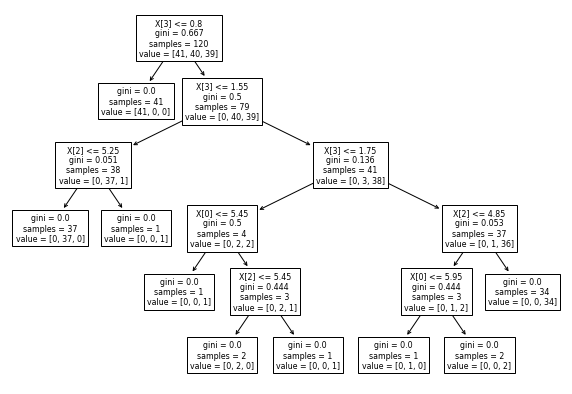

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt_clf)
plt.show()

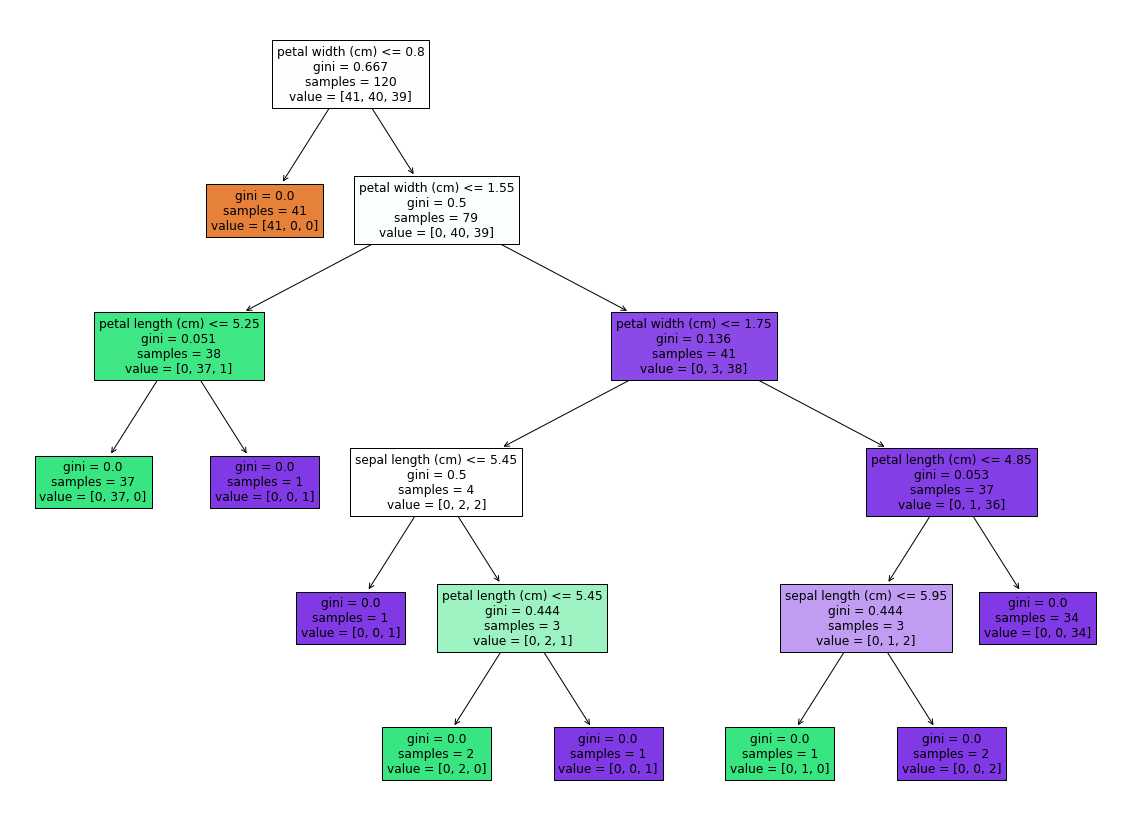

In [29]:
# filled - 클래스에 맞게 노드의 색을 칠함
# feature_names - 특성의 이름을 전달
# gini (gini impurity) - 불순도
plt.figure(figsize=(20,15))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names)
plt.show()

In [30]:
from sklearn.datasets import load_diabetes

In [31]:
diabet  = load_diabetes()
diabet

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [27]:
df = pd.DataFrame(diabet.data , columns=diabet.feature_names)

In [28]:
df['label'] = diabet.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  label   442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
